In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans

In [19]:
	
df = pd.read_csv('Obesity Classification.csv')

In [20]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [22]:
df.nunique()

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64

In [23]:
fig=px.histogram(data_frame=df,x='Age',color='Gender',facet_col='Gender',marginal='box',title='Age distribution',color_discrete_sequence=['#2BCDC1','#F66095'])
fig.show()

In [24]:
fig=px.sunburst(df,path=['Gender','Label'],values=df.value_counts().values,color_discrete_sequence=['#2BCDC1','#F66095'])
fig.show()

In [25]:
import plotly.figure_factory as ff

fig=ff.create_distplot([df[df['Gender']=='Male']['BMI'],df[df['Gender']=='Female']['BMI']],['Male','Female'],colors=['#2BCDC1','#F66095'])
fig.update_layout(title_text='BMI distribution')
fig.show()

In [26]:
df2=df.drop('ID',axis=1)
df2=pd.get_dummies(df2)
df2.head()

,Age,Height,Weight,BMI,Gender_Female,Gender_Male,Label_Normal Weight,Label_Obese,Label_Overweight,Label_Underweight
0,25,175,80,25.3,0,1,1,0,0,0
1,30,160,60,22.5,1,0,1,0,0,0
2,35,180,90,27.3,0,1,0,0,1,0
3,40,150,50,20.0,1,0,0,0,0,1
4,45,190,100,31.2,0,1,0,1,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Convert categorical variable into integers 
df3=df.copy()
df3['Gender'] = le.fit_transform(df3['Gender'])

In [28]:
df3.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight


In [29]:
# Age binning
df4=df.copy()
df4['Age'].min(),df4['Age'].max()

(11, 112)

In [30]:
bins=[0,20,40,60,80,100,200]
df4['Age_bins']=pd.cut(df4['Age'],bins)
df4.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label,Age_bins
0,1,25,Male,175,80,25.3,Normal Weight,"(20, 40]"
1,2,30,Female,160,60,22.5,Normal Weight,"(20, 40]"
2,3,35,Male,180,90,27.3,Overweight,"(20, 40]"


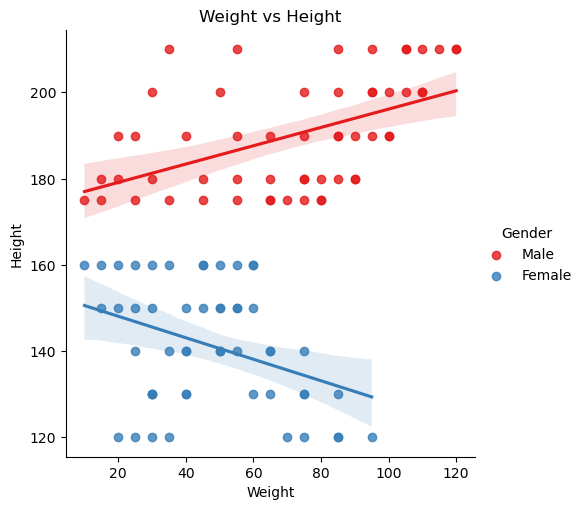

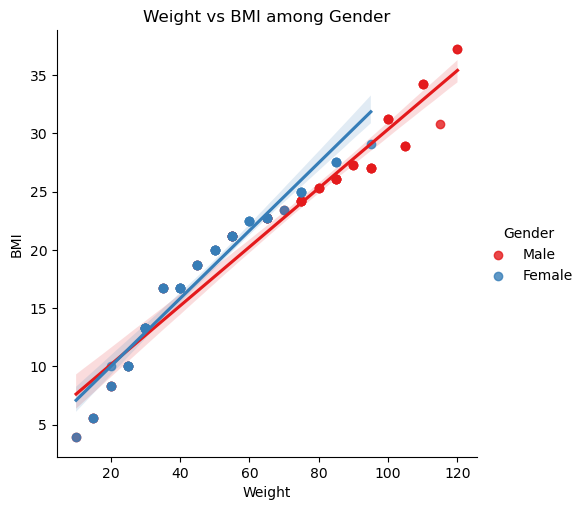

In [31]:
sns.lmplot(x='Weight',y='Height',hue='Gender',data=df4,palette='Set1')
plt.title('Weight vs Height')
plt.show()

sns.lmplot(x='Weight',y='BMI',hue='Gender',data=df4,palette='Set1')
plt.title('Weight vs BMI among Gender')
plt.show()


## Classification using K-means clustering

In [32]:
df.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight


In [33]:
df5=df.copy()
df5['Gender'] = le.fit_transform(df5['Gender'])
df5['Label'] = le.fit_transform(df5['Label'])

In [34]:
X=df5.drop('ID',axis=1)
y=df5['Label']

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

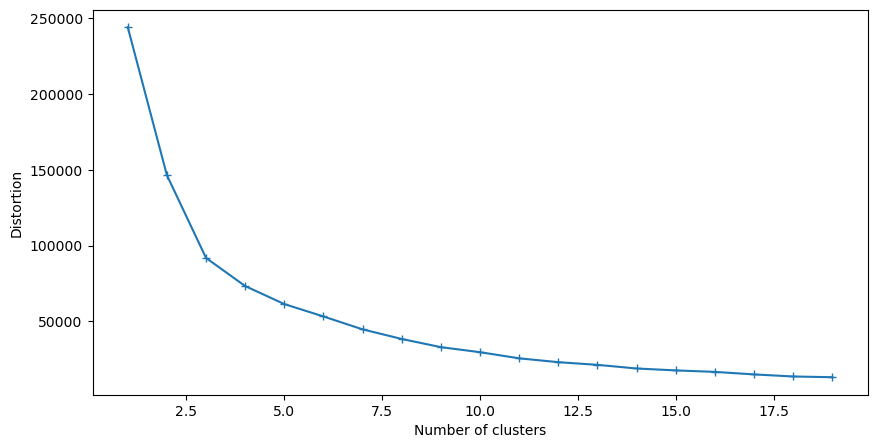

In [35]:
dist_list=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='random',random_state=101)
  kmeans.fit(X)
  dist_list.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [36]:
kmeans4=KMeans(n_clusters=4,random_state=101)

kmeans4.fit(X)

labels=kmeans4.labels_

correct_labels=sum(y==labels)
print('n_clusters=4: %d out of %d samples were correctly labeled.' % (correct_labels,y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



n_clusters=4: 56 out of 108 samples were correctly labeled.
Accuracy score: 0.52


In [37]:
labels=pd.Series(kmeans4.labels_,name='cluster_number')

In [38]:
df_with_cluster=pd.concat([df,labels],axis=1)
df_with_cluster.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label,cluster_number
0,1,25,Male,175,80,25.3,Normal Weight,2
1,2,30,Female,160,60,22.5,Normal Weight,2
2,3,35,Male,180,90,27.3,Overweight,2


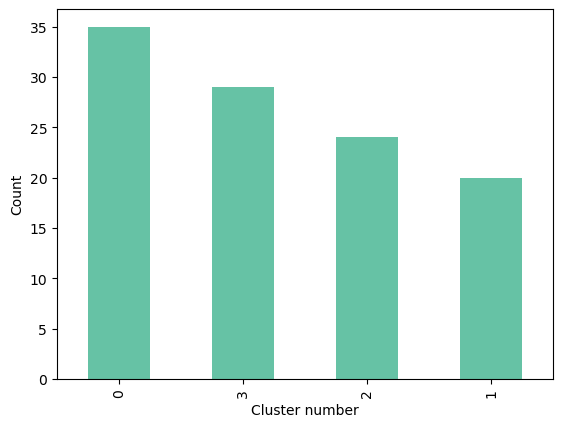

In [39]:
df_with_cluster['cluster_number'].value_counts().plot(kind='bar',cmap='Set2')
plt.xlabel('Cluster number')
plt.ylabel('Count')
plt.show()

In [40]:
# Age binning
bins=[0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,112]
df_with_cluster['Age_bins']=pd.cut(df_with_cluster['Age'],bins)

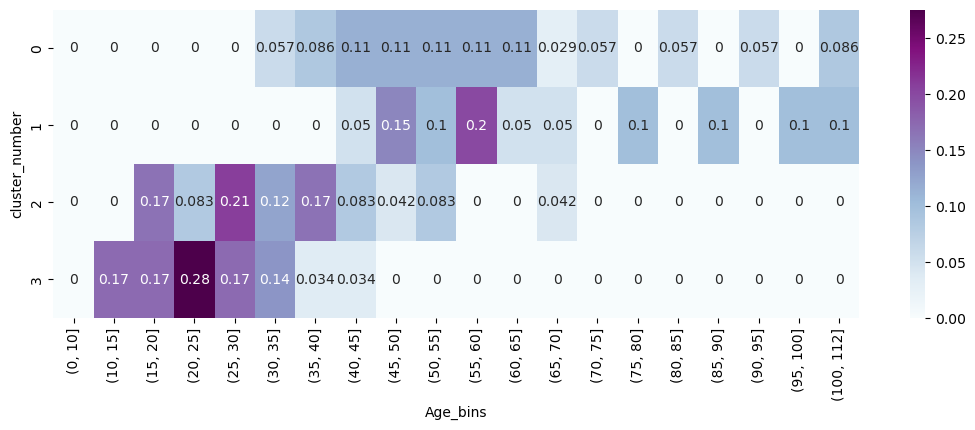

In [41]:
df_cluster_age=df_with_cluster.groupby(['cluster_number','Age_bins']).size().unstack().fillna(0)
sns.heatmap(df_cluster_age.apply(lambda x:x/x.sum(),axis=1),annot=True,cmap='BuPu')
plt.gcf().set_size_inches(13,4)
plt.show()

In [42]:
print(df.head(10))

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
5   6   50  Female     140      40  16.7    Underweight
6   7   55    Male     200     110  34.2          Obese
7   8   60  Female     130      30  13.3    Underweight
8   9   65    Male     210     120  37.2          Obese
9  10   70  Female     120      20  10.0    Underweight


In [43]:
print(df.iloc[60:75])

    ID  Age  Gender  Height  Weight   BMI          Label
60  63   26    Male     180      65  22.7  Normal Weight
61  64   31  Female     150      45  18.7    Underweight
62  65   36    Male     190      75  24.2  Normal Weight
63  66   41  Female     140      55  21.2  Normal Weight
64  67   46    Male     200      85  26.1     Overweight
65  68   51  Female     130      65  22.7  Normal Weight
66  69   56    Male     210      95  27.0     Overweight
67  70   61  Female     120      75  25.0     Overweight
68  71   15    Male     175      45  18.7    Underweight
69  72   20  Female     160      30  13.3    Underweight
70  73   25    Male     180      55  21.2  Normal Weight
71  74   30  Female     150      40  16.7    Underweight
72  75   35    Male     190      65  22.7  Normal Weight
73  76   40  Female     140      50  20.0    Underweight
74  77   45    Male     200      75  24.2  Normal Weight
